# Big basket Analysis

## Creating a class for all the basic functions on the dataset

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
class big_basket:
    def __init__(self):
        ''' '''
        import pandas as pd
        self.data=pd.read_excel('BigBasketDataset.xlsx','Sheet1') # Reading the sheet 1
        
    def get_unique(self):
        ''' To get unqiue details about the dataset '''
        print('[+] The dataset has -',self.data.shape[0],' data points')
        print('                    -',self.data['Member'].nunique(),' customer details')
        print('                    -',self.data['Description'].nunique(),' unique products')
        print('                    - data for ',(self.data['Date'].max()-self.data['Date'].min()).days,' days' )

In [56]:
bb=big_basket()

In [57]:
bb.get_unique()

[+] The dataset has - 59244  data points
                    - 106  customer details
                    - 214  unique products
                    - data for  1332  days


# Exploratory Data Analysis


## Popularity based recommender system

In [58]:
bb.data['Description'].value_counts()[0:15]

Beans                4380
Other Vegetables     4370
Root Vegetables      4105
Other Dals           3109
Organic F&V          3036
Gourd & Cucumber     2846
Whole Spices         2803
Brinjals             2467
Namkeen              2138
Banana               2089
Exotic Vegetables    1336
Moong Dal            1312
Sugar                1278
Toor Dal             1244
Sooji & Rava         1219
Name: Description, dtype: int64

#### The above are the product with maximum sales. Hence these can be recommended for new users, when we do not have any specific user details

#### Adding some new columns

In [59]:
bb.data['Month']=bb.data['Date'].apply(lambda x: x.month )
bb.data['Day']=bb.data['Date'].apply(lambda x: x.day )
bb.data['Year']=bb.data['Date'].apply(lambda x: x.year )

In [153]:
bb.data.head()

,Member,Order,SKU,Date,Description,Month,Day,Year
0,M09736,6468572,34993740,2014-09-22,Other Sauces,9,22,2014
1,M09736,6468572,15669800,2014-09-22,Cashews,9,22,2014
2,M09736,6468572,34989501,2014-09-22,Other Dals,9,22,2014
3,M09736,6468572,7572303,2014-09-22,Namkeen,9,22,2014
4,M09736,6468572,15669856,2014-09-22,Sugar,9,22,2014


# Checking for missing values or discrepancies

In [62]:
bb.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59244 entries, 0 to 59243
Data columns (total 8 columns):
Member         59244 non-null object
Order          59244 non-null int64
SKU            59244 non-null int64
Date           59244 non-null datetime64[ns]
Description    59244 non-null object
Month          59244 non-null int64
Day            59244 non-null int64
Year           59244 non-null int64
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 3.6+ MB


Seems like there are no NAN values

In [65]:
bb.data['Member'].unique()

array(['M09736', 'M39021', 'M47229', 'M76390', 'M77779', 'M78365',
       'M78720', 'M82651', 'M84827', 'M86304', 'M86572', 'M90375',
       'M91098', 'M96365', 'M99030', 'M99206', 'M04158', 'M08075',
       'M09303', 'M12050', 'M12127', 'M14746', 'M16218', 'M16611',
       'M18732', 'M22037', 'M25900', 'M27458', 'M27871', 'M31101',
       'M31908', 'M31966', 'M32039', 'M32409', 'M32449', 'M32480',
       'M32655', 'M33064', 'M33422', 'M33491', 'M33558', 'M33745',
       'M33767', 'M34566', 'M35070', 'M35464', 'M35538', 'M35649',
       'M36366', 'M36432', 'M36702', 'M36876', 'M37253', 'M37600',
       'M38622', 'M40184', 'M41700', 'M41747', 'M41781', 'M42182',
       'M42513', 'M42827', 'M43189', 'M43831', 'M43977', 'M44156',
       'M45375', 'M45470', 'M46325', 'M46328', 'M46575', 'M46687',
       'M48101', 'M48154', 'M48938', 'M50038', 'M50094', 'M50420',
       'M50767', 'M51043', 'M51278', 'M52629', 'M54100', 'M54345',
       'M54382', 'M54619', 'M54796', 'M55932', 'M56255', 'M563

In [68]:
bb.data['Order'].nunique()

8001

#### The dataset does not seem to have any discrepancies

# Understanding the purchase patterns over time

Text(0.5, 1.0, 'Customer Purchase patterns over the years')

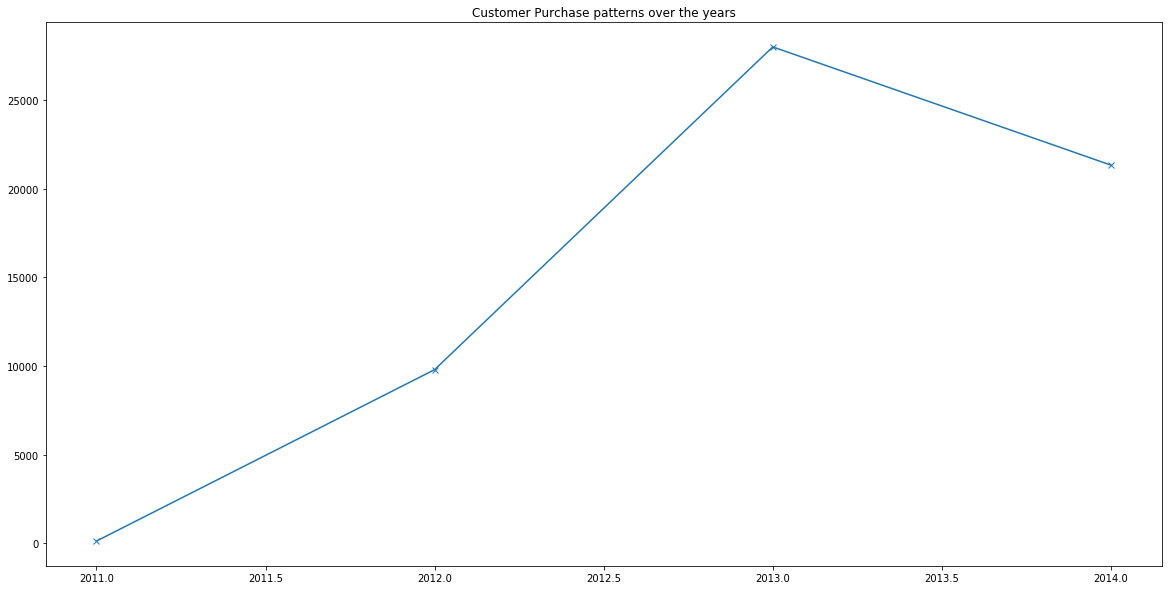

In [81]:
plt.figure(figsize=(20,10))
plt.plot(bb.data.groupby(by='Year').count()['Order'].index,bb.data.groupby(by='Year').count()['Order'].values,marker='x')
plt.title('Customer Purchase patterns over the years')

In [83]:
# Trying to understand the reason for drop in 2014
bb.data['Date'].max()

# We have data till 3rd November, which is almost the whole year. 

Timestamp('2014-11-03 00:00:00')

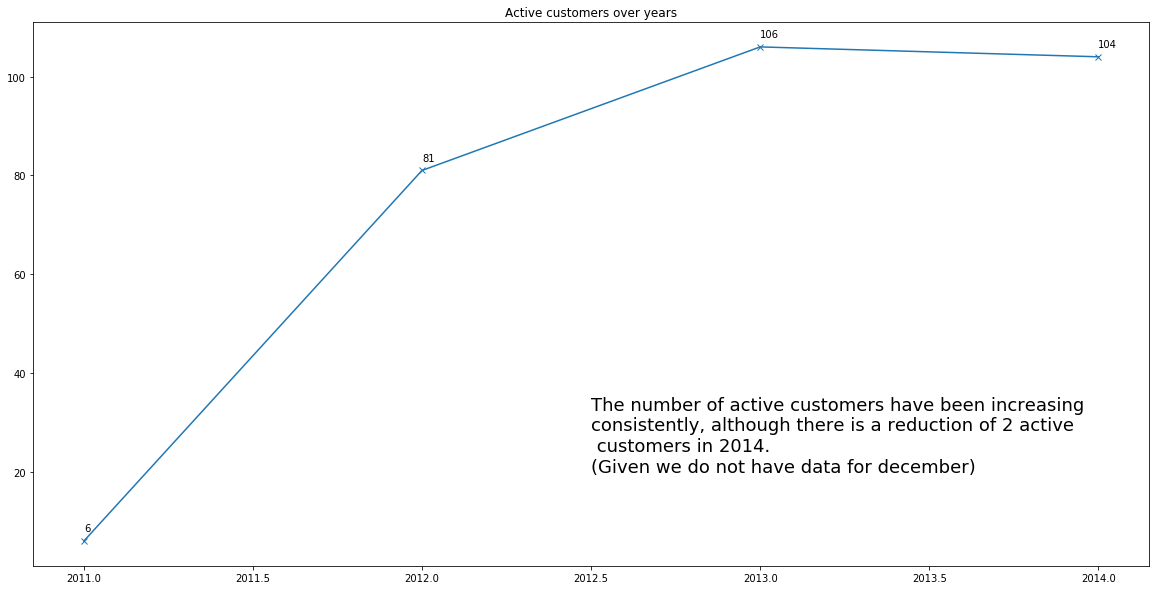

In [120]:
# Checking the number of customers over years
plt.figure(figsize=(20,10))
customers_over_years=[bb.data[bb.data['Year']==year]['Member'].nunique()   for year in bb.data['Year'].unique()]
plt.plot(bb.data['Year'].unique(),customers_over_years,marker='x')
plt.title('Active customers over years')
for year,value in zip(bb.data['Year'].unique(),customers_over_years):
    plt.text(year,value+2,str(value))
plt.text(2012.5, 20, 'The number of active customers have been increasing \nconsistently, although there is a reduction of 2 active\n customers in 2014. \n(Given we do not have data for december)', fontsize = 18)
plt.show()

In [124]:
bb.data[bb.data['Year']==2013].groupby(by='Month').count()['Member'].values

array([2428, 1807, 2026, 1944, 2458, 2385, 2693, 2572, 2499, 2503, 2345,
       2343])

In [143]:
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}

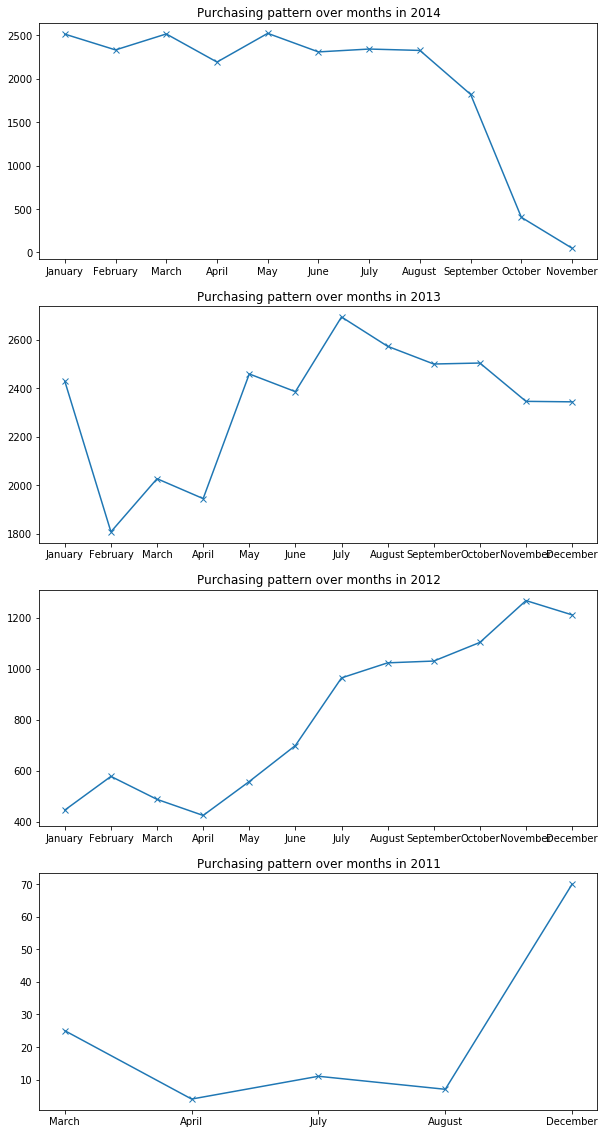

In [149]:
# Understanding the change in purchase habbits over the months
plt.figure(figsize=(10,20))
i=1
for year in bb.data['Year'].unique():
    plt.subplot(4,1,i)
    data=bb.data[bb.data['Year']==year].groupby(by='Month').count()['Member']
    plt.plot([months[i] for i in data.index],data.values,marker='x')
    plt.title('Purchasing pattern over months in '+str(year))
    i+=1

#### It can be seen that there is considerable increase in customer purchases till 2014 May, and the purchases has been dropping since then

# Identifying the products purchased after 2014 April

In [156]:
bb.data[(bb.data['Year']==2014)&(bb.data['Month']>4)]['Description'].value_counts()

Root Vegetables                                                                                                                                                                      837
Other Vegetables                                                                                                                                                                     831
Beans                                                                                                                                                                                714
Other Dals                                                                                                                                                                           698
Whole Spices                                                                                                                                                                         672
Namkeen                                                                    

## Variation of Customer Purcharse habbits

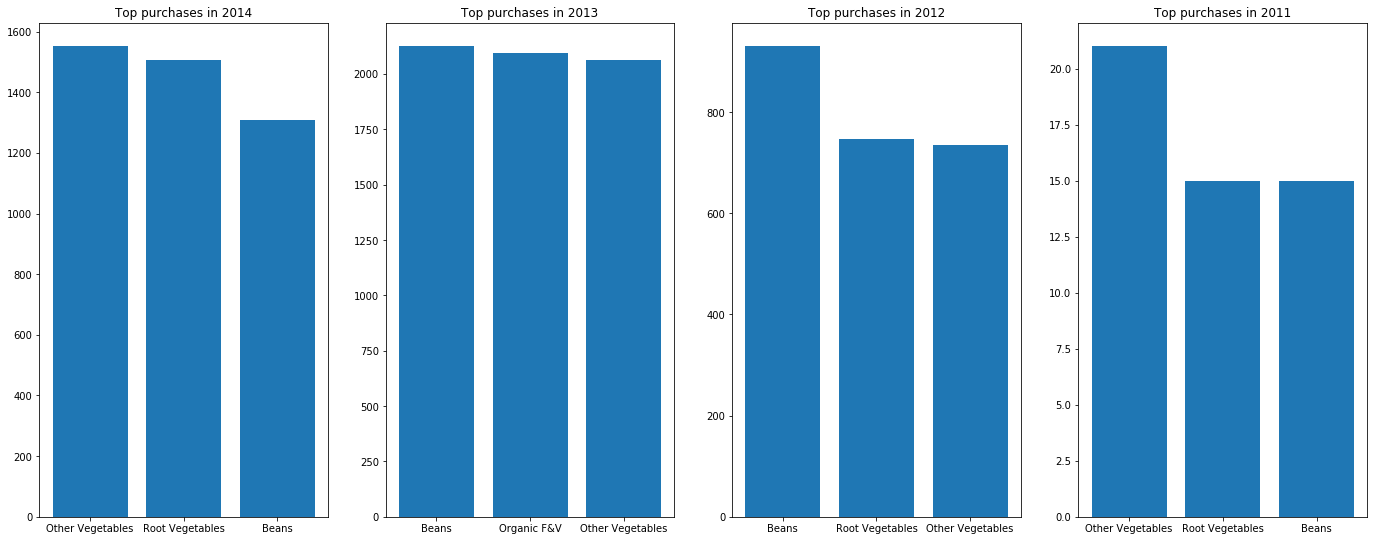

In [8]:
plt.figure(figsize=(30,20))
i=1
for year in bb.data['Year'].unique():
    x_axis=[bb.data[bb.data['Year']==year]['Description'].value_counts()[0:3].index]
    y_axis=[bb.data[bb.data['Year']==year]['Description'].value_counts()[0:3].values]
    plt.subplot(2,5,i)
    plt.bar(x_axis[0],y_axis[0])
    plt.title('Top purchases in '+str(year))
    i+=1

### It seems that Beans, Root Vegatables, and Organic Vegatables are the most purchsed product over the years

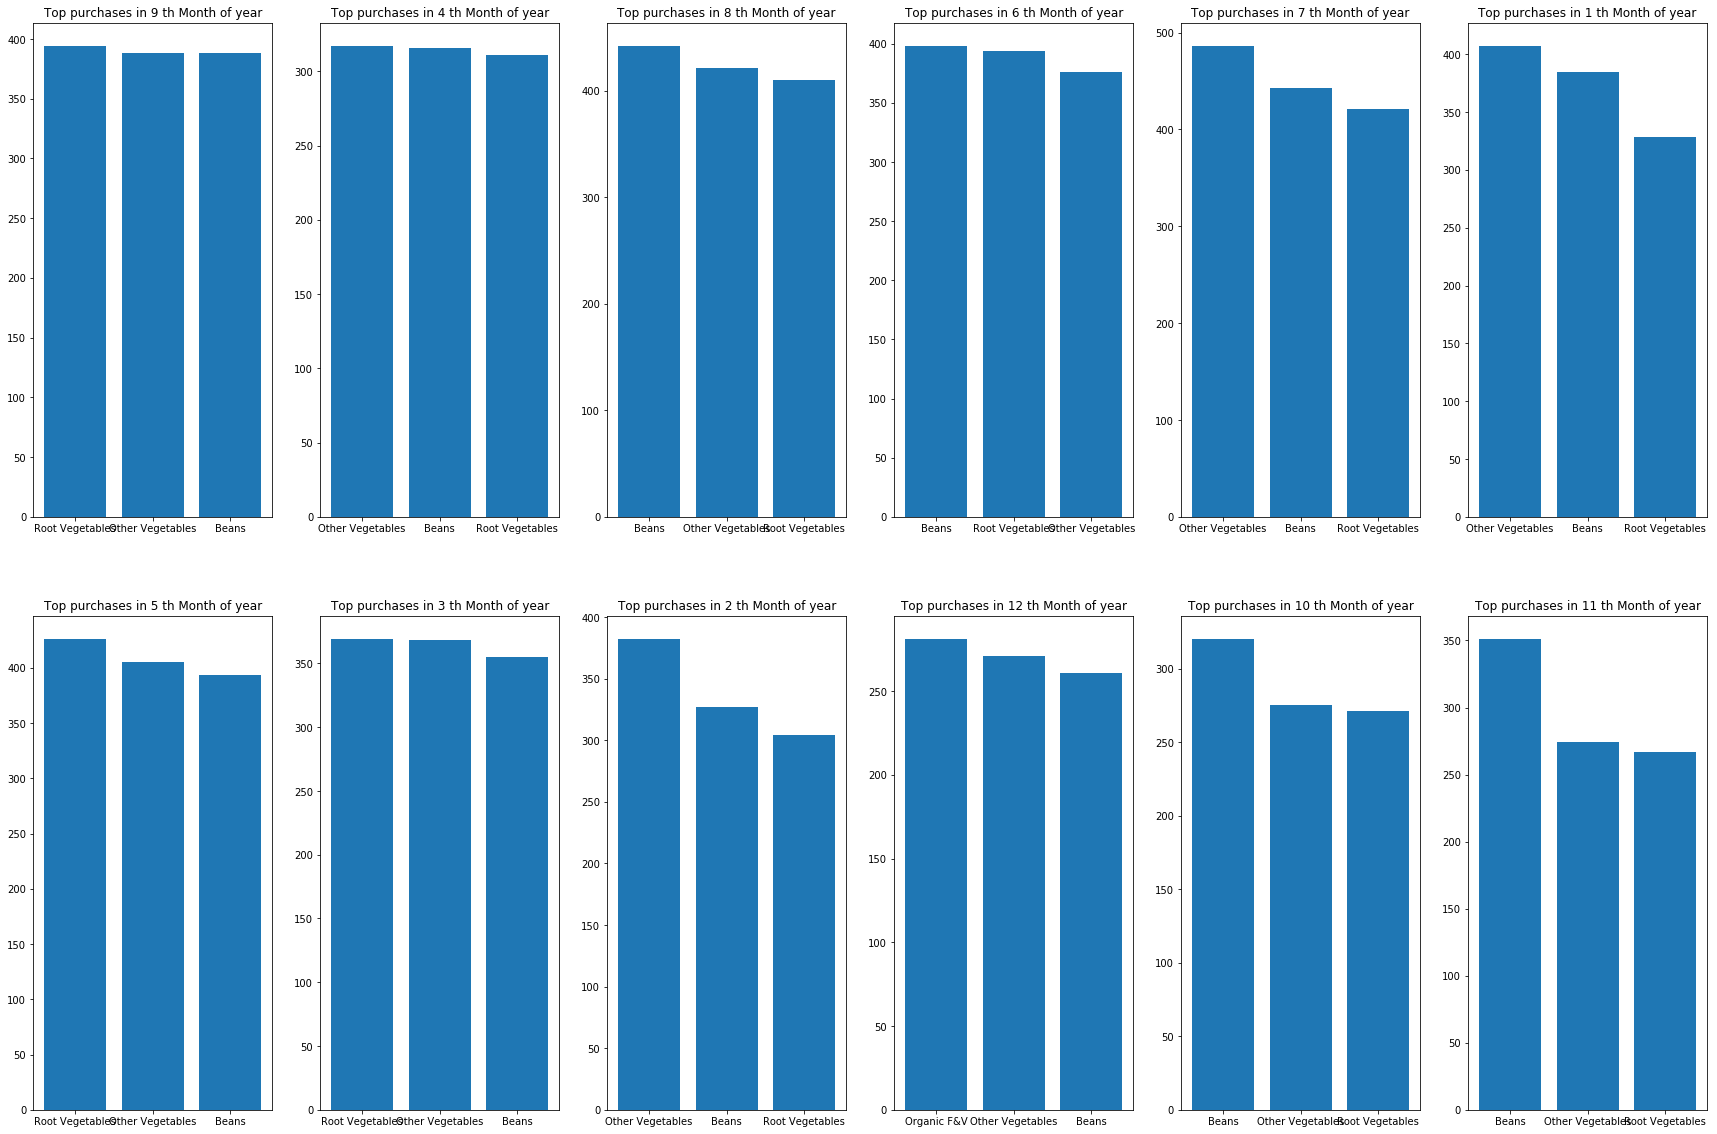

In [9]:
plt.figure(figsize=(30,20))
i=1
for month in bb.data['Month'].unique():
    x_axis=[bb.data[bb.data['Month']==month]['Description'].value_counts()[0:3].index]
    y_axis=[bb.data[bb.data['Month']==month]['Description'].value_counts()[0:3].values]
    plt.subplot(2,6,i)
    plt.bar(x_axis[0],y_axis[0])
    plt.title('Top purchases in '+str(month)+' th Month of year')
    i+=1

### Based on the most purchased products and the changing trends over the years and months, it seems that Beans, Other vegatables and Root vegetables are something which can be recommended to new users

# Creating clusters for different user groups

In [10]:
top1=[]
top2=[]
top3=[]
top4=[]
members=[]
for member in bb.data['Member'].unique():
    members.append(member)
    top1.append(bb.data[bb.data['Member']==member]['Description'].value_counts()[0:4].index[0])
    top2.append(bb.data[bb.data['Member']==member]['Description'].value_counts()[0:4].index[1])
    top3.append(bb.data[bb.data['Member']==member]['Description'].value_counts()[0:4].index[2])
    top4.append(bb.data[bb.data['Member']==member]['Description'].value_counts()[0:4].index[3])


In [11]:
t1=[]
t2=[]
t3=[]
t4=[]
for i,row in bb.data.iterrows():
    index = members.index(row['Member'])
    t1.append(top1[index])
    t2.append(top2[index])
    t3.append(top3[index])
    t4.append(top4[index])

In [12]:
bb.data['Top1']=t1
bb.data['Top2']=t2
bb.data['Top3']=t3
bb.data['Top4']=t4


#### Label Encoding the data

In [13]:
products=list(bb.data['Top1'])+list(bb.data['Top2'])+list(bb.data['Top3'])+list(bb.data['Top4'])
products=list(set(products))
product_dictionary={}
product_dictionary={ products[i]: i for i in range(len(products))}

In [14]:
cluster_data=bb.data[['Top1', 'Top2', 'Top3', 'Top4']]
for column in cluster_data.columns:
    cluster_data[column]=cluster_data[column].apply(lambda x: product_dictionary[x])

/home/blink/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Creating clusters with Kmeans

/home/blink/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
100%|██████████| 38/38 [00:25<00:00,  1.11s/it]


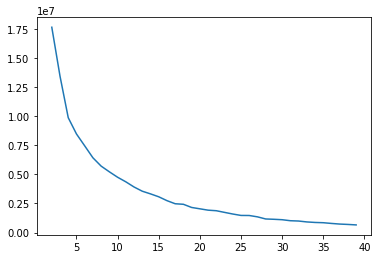

In [15]:
import numpy as np
from sklearn.cluster  import KMeans
from tqdm import tqdm
scores=[]
for i in tqdm(range(2,40)):
    km=KMeans(n_clusters=i)
    km.fit(cluster_data)
    scores.append(km.inertia_)

plt.plot(np.arange(2,40),scores)

In [16]:
km=KMeans(n_clusters=5)
km.fit(cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
classes=km.predict(cluster_data)

In [18]:
bb.data['Cluster']=classes

In [19]:
bb.data[bb.data['Cluster']==1].head()

,Member,Order,SKU,Date,Description,Month,Day,Year,Top1,Top2,Top3,Top4,Cluster
554,M39021,6422636,7580802,2014-09-28,Sunflower Oils,9,28,2014,Beans,Root Vegetables,Sunflower Oils,Other Vegetables,1
555,M39021,6422636,15668453,2014-09-28,Brinjals,9,28,2014,Beans,Root Vegetables,Sunflower Oils,Other Vegetables,1
556,M39021,6422636,15668375,2014-09-28,Root Vegetables,9,28,2014,Beans,Root Vegetables,Sunflower Oils,Other Vegetables,1
557,M39021,6422636,15668379,2014-09-28,Other Vegetables,9,28,2014,Beans,Root Vegetables,Sunflower Oils,Other Vegetables,1
558,M39021,6422636,15669760,2014-09-28,Whole Spices,9,28,2014,Beans,Root Vegetables,Sunflower Oils,Other Vegetables,1


In [20]:
bb.data[bb.data['Cluster']==0].head()

,Member,Order,SKU,Date,Description,Month,Day,Year,Top1,Top2,Top3,Top4,Cluster
969,M47229,6764413,7621580,2014-02-07,Diapers & Wipes,2,7,2014,Beans,Root Vegetables,Other Vegetables,Whole Spices,0
970,M47229,6764413,92866692,2014-02-07,Diapers & Wipes,2,7,2014,Beans,Root Vegetables,Other Vegetables,Whole Spices,0
971,M47229,6764413,7630963,2014-02-07,Tomato Ketchup,2,7,2014,Beans,Root Vegetables,Other Vegetables,Whole Spices,0
972,M47229,6810613,15669870,2014-06-27,Sooji & Rava,6,27,2014,Beans,Root Vegetables,Other Vegetables,Whole Spices,0
973,M47229,6810613,15668473,2014-06-27,Beans,6,27,2014,Beans,Root Vegetables,Other Vegetables,Whole Spices,0


In [21]:
bb.data[bb.data['Cluster']==2].head()

,Member,Order,SKU,Date,Description,Month,Day,Year,Top1,Top2,Top3,Top4,Cluster
2203,M78365,6470598,34986122,2014-09-23,Whole Spices,9,23,2014,Root Vegetables,Other Vegetables,Whole Spices,Gourd & Cucumber,2
2204,M78365,6470598,34993759,2014-09-23,Other Sauces,9,23,2014,Root Vegetables,Other Vegetables,Whole Spices,Gourd & Cucumber,2
2205,M78365,6470598,34986118,2014-09-23,Whole Spices,9,23,2014,Root Vegetables,Other Vegetables,Whole Spices,Gourd & Cucumber,2
2206,M78365,6470598,21408913,2014-09-23,Whole Spices,9,23,2014,Root Vegetables,Other Vegetables,Whole Spices,Gourd & Cucumber,2
2207,M78365,6470598,34993740,2014-09-23,Other Sauces,9,23,2014,Root Vegetables,Other Vegetables,Whole Spices,Gourd & Cucumber,2


In [22]:
bb.data[bb.data['Cluster']==3].head()

,Member,Order,SKU,Date,Description,Month,Day,Year,Top1,Top2,Top3,Top4,Cluster
0,M09736,6468572,34993740,2014-09-22,Other Sauces,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,3
1,M09736,6468572,15669800,2014-09-22,Cashews,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,3
2,M09736,6468572,34989501,2014-09-22,Other Dals,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,3
3,M09736,6468572,7572303,2014-09-22,Namkeen,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,3
4,M09736,6468572,15669856,2014-09-22,Sugar,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,3


In [23]:
bb.data[bb.data['Cluster']==4].head()

,Member,Order,SKU,Date,Description,Month,Day,Year,Top1,Top2,Top3,Top4,Cluster
4222,M86304,6440137,15669879,2014-04-10,Other Dals,4,10,2014,Other Vegetables,Gourd & Cucumber,Other Dals,Whole Spices,4
4223,M86304,6440137,15669885,2014-04-10,Moong Dal,4,10,2014,Other Vegetables,Gourd & Cucumber,Other Dals,Whole Spices,4
4224,M86304,6440137,15668380,2014-04-10,Other Vegetables,4,10,2014,Other Vegetables,Gourd & Cucumber,Other Dals,Whole Spices,4
4225,M86304,6440137,15668458,2014-04-10,Brinjals,4,10,2014,Other Vegetables,Gourd & Cucumber,Other Dals,Whole Spices,4
4226,M86304,6440137,7621686,2014-04-10,Butter & Cream,4,10,2014,Other Vegetables,Gourd & Cucumber,Other Dals,Whole Spices,4


# Now we can segment the customers into these clusters and give them recommendation based on the shopping patterns. 
# This will also help in classifying a new customer quickly based on their shopping patterns
# The problem with this approach is, if a new product is added, the model will have to be trained again. 

# Understanding the purchasing patterns over time 

In [53]:
pd.pivot_table(bb.data[bb.data['Member']=='M47229'],index='Order')

,Cluster,Day,Month,SKU,Year
Order,,,,,
6764413,0,7,2,3.603974e+07,2014
6810613,0,27,6,1.515528e+07,2014
7344021,0,14,10,1.566847e+07,2013
7344026,0,14,10,1.566914e+07,2013
7348830,0,16,10,5.035396e+07,2013
7364862,0,27,10,2.014401e+07,2013
7381180,0,28,9,2.110834e+07,2013
7395210,0,10,5,1.638621e+07,2013
7411467,0,9,6,1.818886e+07,2013
